In [1]:
# -*- coding: UTF-8 -*-
#%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [2]:
from __future__ import division
import tensorflow as tf
from os import path
import numpy as np
import pandas as pd
import csv
from sklearn.model_selection import StratifiedShuffleSplit
from time import time
from matplotlib import pyplot as plt
import seaborn as sns
from mylibs.jupyter_notebook_helper import show_graph
from tensorflow.contrib import rnn
from tensorflow.contrib import learn
import shutil
from tensorflow.contrib.learn.python.learn import learn_runner
from IPython.display import Image
from IPython.core.display import HTML
from mylibs.tf_helper import getDefaultGPUconfig
from sklearn.metrics import r2_score
from mylibs.py_helper import factors
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
from statsmodels.tsa.stattools import coint
from sklearn.linear_model import LinearRegression
from scipy.signal import detrend
from common import get_or_run_nn
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import coint
from models.my_27_baseline import MyBaseline

/home/studenthp/anaconda2/envs/dis/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
dtype = tf.float32
seed = 16011984
random_state = np.random.RandomState(seed=seed)
config = getDefaultGPUconfig()
%matplotlib inline

In [4]:
data_path = '../../../../Dropbox/data'

In [5]:
ph_data_path = data_path + '/price_history'

In [6]:
npz_train_reduced = ph_data_path + '/price_history_mobattrs_date_dp_60to30_62020_6000_train.npz'
npz_train = ph_data_path + '/price_history_mobattrs_date_dp_60to30_62020_train.npz'
npz_test = ph_data_path + '/price_history_mobattrs_date_dp_60to30_62020_test.npz'
assert path.isfile(npz_train_reduced)
assert path.isfile(npz_train)
assert path.isfile(npz_test)

In [7]:
#Our batch size is 64 that is why we want train and test size that will be divided exactly by 64
batch_size = 100
train_full_size = len(np.load(npz_train)['inputs'])
train_size = len(np.load(npz_train_reduced)['inputs'])
test_size = len(np.load(npz_test)['inputs'])
assert train_size % batch_size == 0 and test_size % batch_size == 0

typical_split_size = 5 #for cross validation
assert train_size % typical_split_size == 0 and (train_size / typical_split_size) % batch_size == 0

train_full_size, train_size, test_size

(55820, 6000, 6200)

# Baseline is static, a straight line for each input - Test

In [8]:
bltest = MyBaseline(npz_path=npz_test)

In [9]:
bltest.getMSE()

0.0073356416100968606

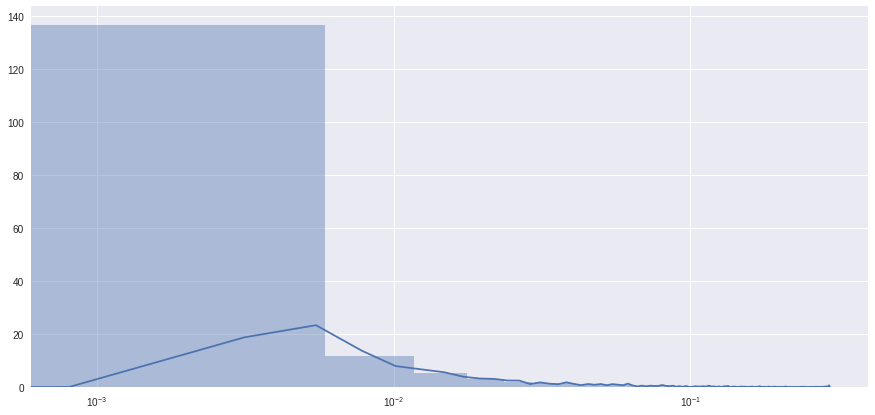

In [10]:
bltest.renderMSEs()
plt.show()

In [11]:
bltest.getHuberLoss()

0.005181441272113646

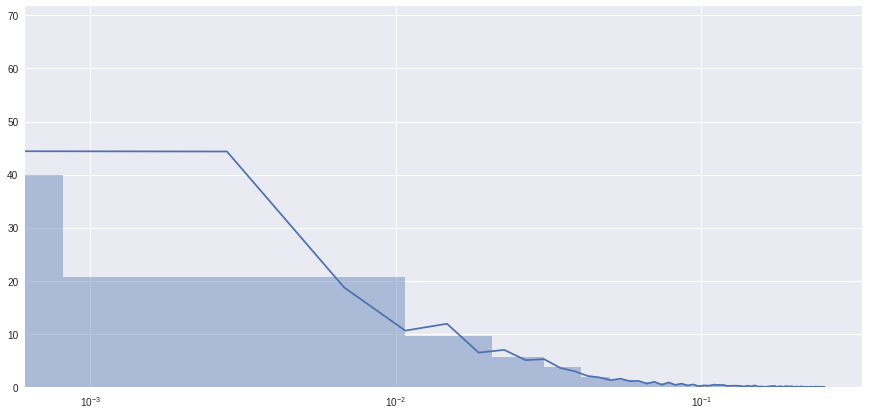

In [12]:
bltest.renderHuberLosses()
plt.show()

In [13]:
%%time
bltest.get_dtw()

CPU times: user 38.1 s, sys: 136 ms, total: 38.2 s
Wall time: 37.9 s


1.1328810436818912

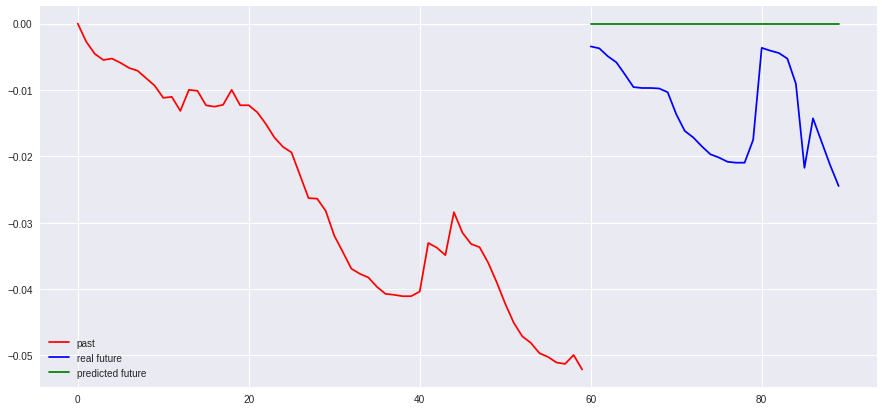

In [14]:
bltest.renderRandomTargetVsPrediction()
plt.show()

# Baseline is static, a straight line for each input - Train (small)

In [16]:
bltrainsmall = MyBaseline(npz_path=npz_train_reduced)

In [17]:
bltrainsmall.getMSE()

0.0067634888342177667

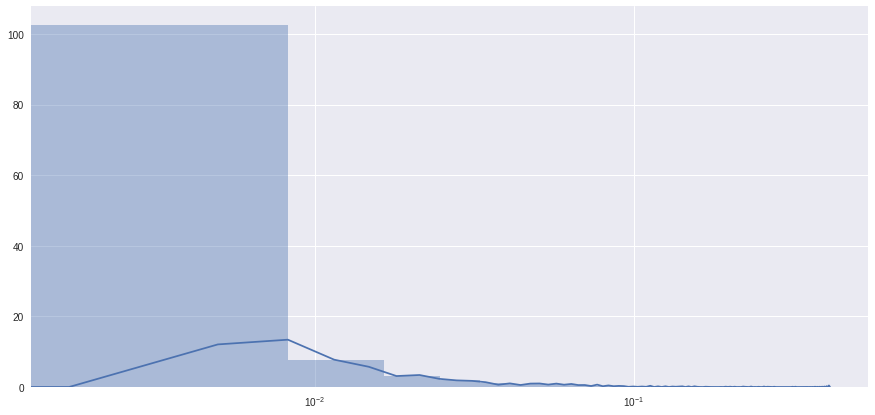

In [18]:
bltrainsmall.renderMSEs()
plt.show()

In [19]:
bltrainsmall.getHuberLoss()

0.0057794194246570891

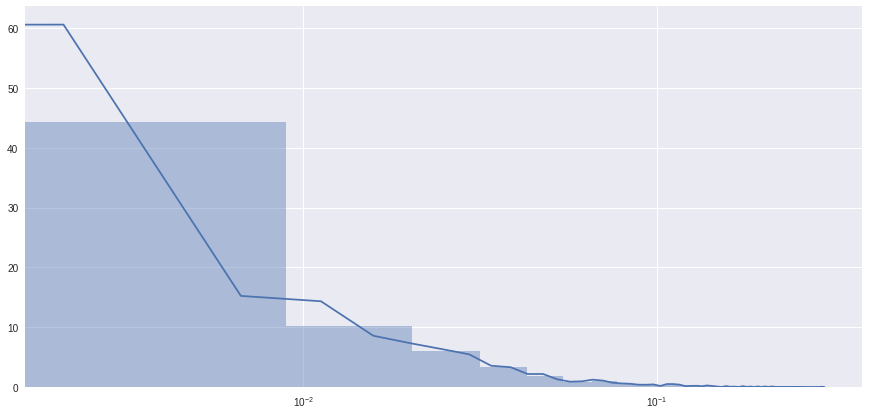

In [20]:
bltrainsmall.renderHuberLosses()
plt.show()

In [44]:
# myran = lambda: np.random.randn() * 1e-3
# dtw_scores = [fastdtw(bltrainsmall.targets[ind], bltrainsmall.targets[ind] + myran())[0] 
#               for ind in range(len(bltrainsmall.targets))]
# np.mean(dtw_scores)

0.023131977074719937

In [21]:
%%time
bltrainsmall.get_dtw()

CPU times: user 51.8 s, sys: 172 ms, total: 51.9 s
Wall time: 51.8 s


1.097277832655853

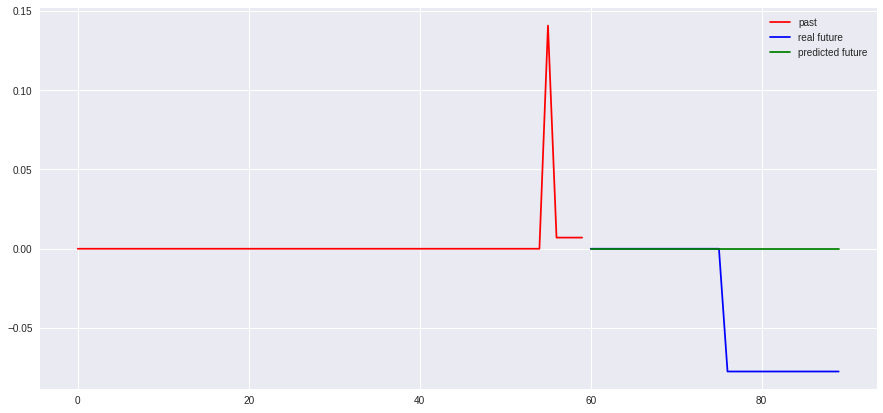

In [22]:
bltrainsmall.renderRandomTargetVsPrediction()
plt.show()

# Baseline is static, a straight line for each input - Train Full

In [23]:
bltrain = MyBaseline(npz_path=npz_train)

In [24]:
bltrain.getMSE()

0.0070081309903258383

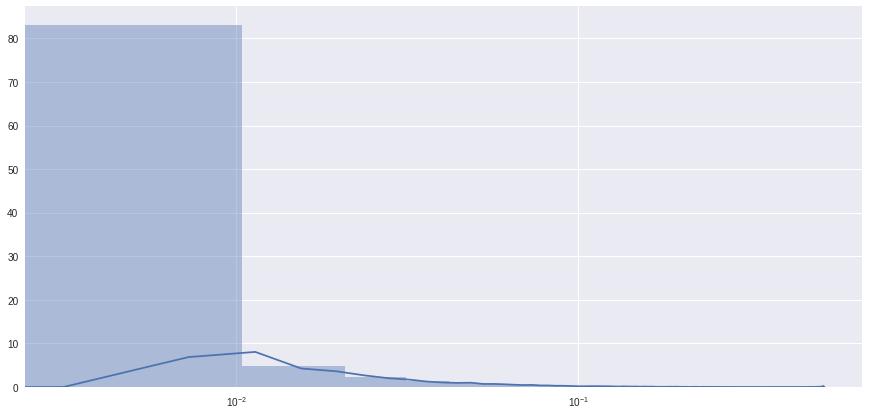

In [25]:
bltrain.renderMSEs()
plt.show()

In [26]:
bltrain.getHuberLoss()

0.0053788250983214415

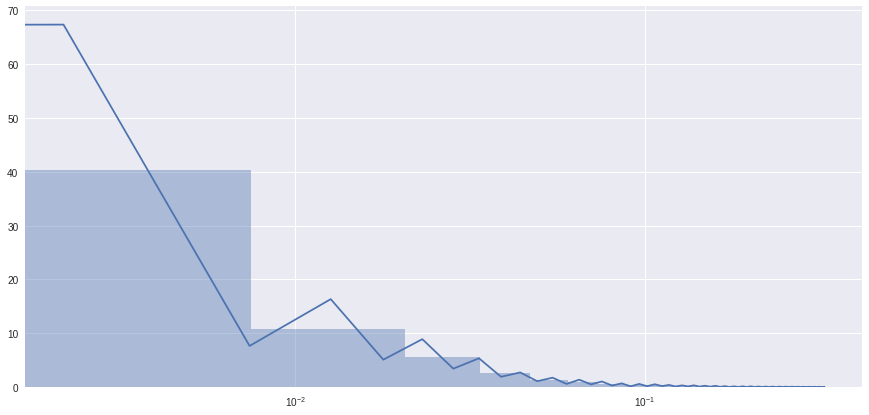

In [27]:
bltrain.renderHuberLosses()
plt.show()

In [28]:
%%time
bltrain.get_dtw()

CPU times: user 7min 34s, sys: 1.67 s, total: 7min 36s
Wall time: 7min 34s


1.0970981352082814

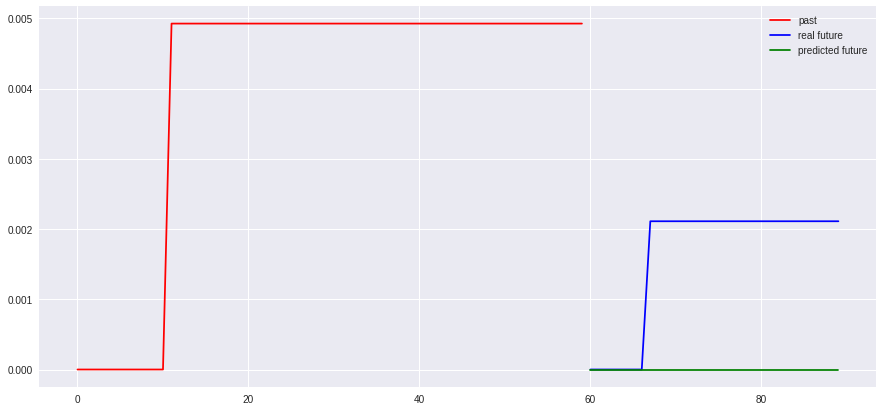

In [35]:
bltrain.renderRandomTargetVsPrediction()
plt.show()